Source: https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/explorer/crime/crime-trend

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Rate_of_Homicide.csv')
df1 = pd.read_csv('/content/Offender_Age.csv')
df2 = pd.read_csv('/content/Offender_Ethnicity.csv')
df3 = pd.read_csv('/content/Offender_Race.csv')
df4 = pd.read_csv('/content/Offender_Sex.csv')
df5 = pd.read_csv('/content/Victim_Age.csv')
df6 = pd.read_csv('/content/Victim_Ethnicity.csv')
df7 = pd.read_csv('/content/Victim_Race.csv')
df8 = pd.read_csv('/content/Victim_Sex.csv')

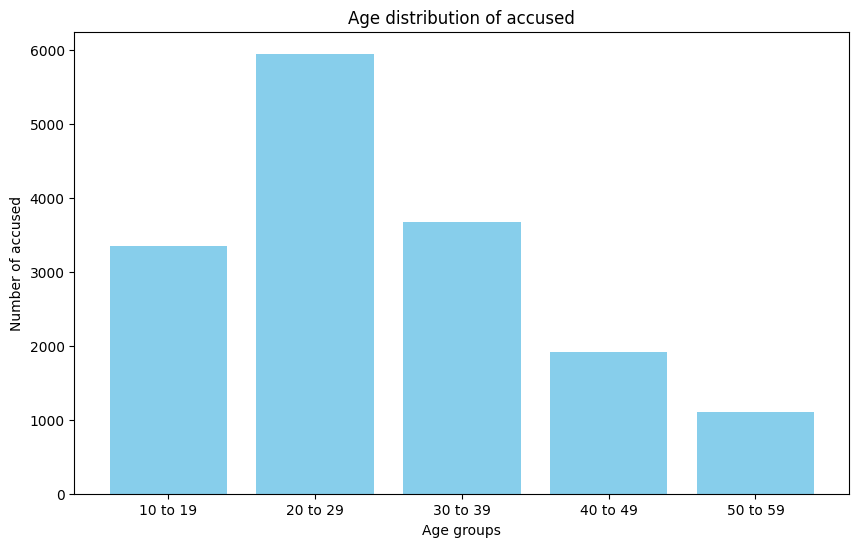

In [ ]:
import matplotlib.pyplot as plt

data = {'key': ['10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59'],
        'value': [3347, 5948, 3669,  1910, 1106]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.bar(df['key'], df['value'], color='skyblue')
plt.title('Age distribution of accused')
plt.xlabel('Age groups')
plt.ylabel('Number of accused')
plt.show()


In [ ]:
import pandas as pd

file_paths = [
    '/content/Offender_Age.csv',
    '/content/Offender_Ethnicity.csv',
    '/content/Offender_Race.csv',
    '/content/Offender_Sex.csv',
    '/content/Victim_Age.csv',
    '/content/Victim_Ethnicity.csv',
    '/content/Victim_Race.csv',
    '/content/Victim_Sex.csv'
]

for file_path in file_paths:
    df = pd.read_csv(file_path)
    print(f"\nTable: {file_path}\n{df}")



Table: /content/Offender_Age.csv
            key  value
0      20 to 29   5948
1      30 to 39   3669
2      10 to 19   3347
3       Unknown   3131
4      40 to 49   1910
5      50 to 59   1106
6      60 to 69    412
7      70 to 79    150
8      80 to 89     60
9   90 to Older     29
10       0 to 9     19

Table: /content/Offender_Ethnicity.csv
            key  value
0  Not Hispanic   9497
1       Unknown   4930
2      Hispanic   2622
3      Multiple      0

Table: /content/Offender_Race.csv
                                key  value
0         Black or African American   9627
1                             White   6603
2                           Unknown   3076
3  American Indian or Alaska Native    220
4                             Asian    200
5                   Native Hawaiian     50

Table: /content/Offender_Sex.csv
  series   Male  Female  Unknown
0   data  15045    2100     2631

Table: /content/Victim_Age.csv
            key  value
0      20 to 29   5324
1      30 to 39   466

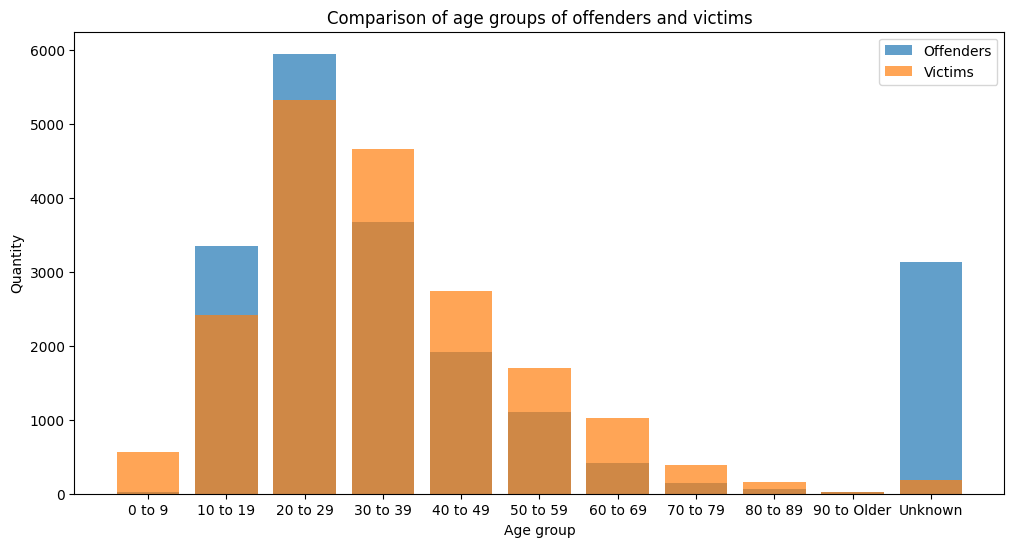

In [ ]:



# Join tables by 'key' (age groups)
merged_df = pd.merge(df1, df5, on='key', suffixes=('_offender', '_victim'))

# Sort the table by age for a more visual graph
merged_df['order'] = pd.Categorical(merged_df['key'], categories=[
    '0 to 9', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79', '80 to 89', '90 to Older', 'Unknown'
], ordered=True)
merged_df = merged_df.sort_values('order')

plt.figure(figsize=(12, 6))
plt.bar(merged_df['key'], merged_df['value_offender'], label='Offenders', alpha=0.7)
plt.bar(merged_df['key'], merged_df['value_victim'], label='Victims', alpha=0.7)
plt.title('Comparison of age groups of offenders and victims')
plt.xlabel('Age group')
plt.ylabel('Quantity')
plt.legend()
plt.show()


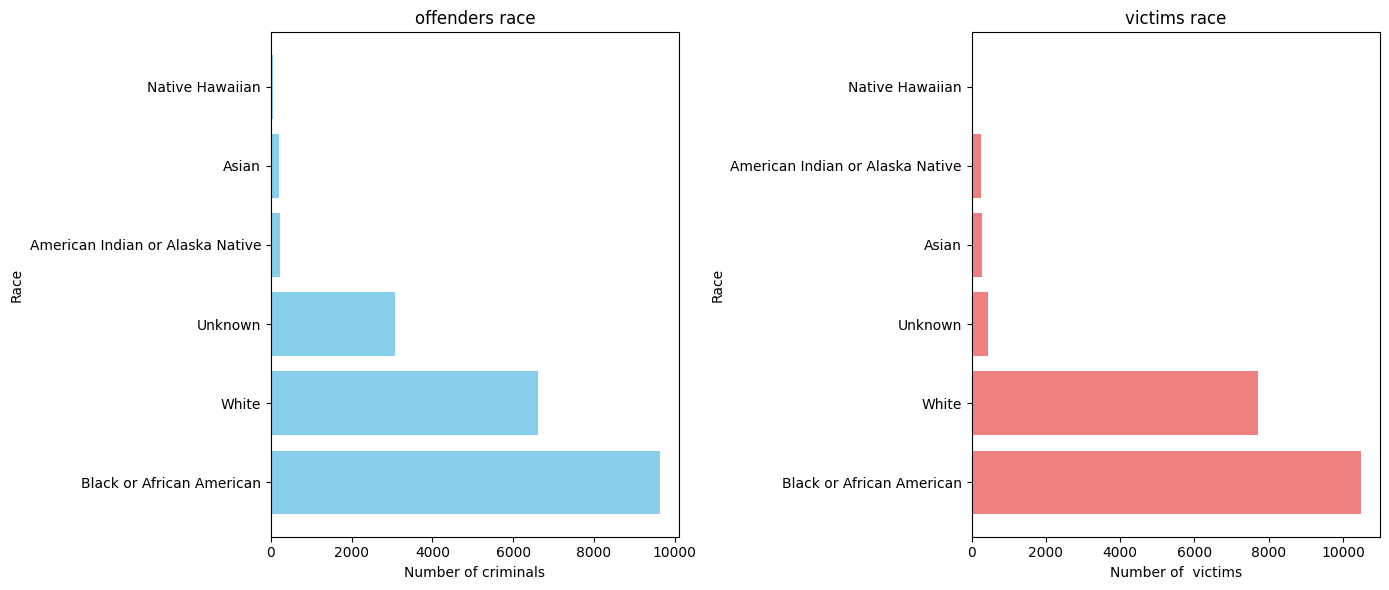

In [ ]:

# Data by race of offenders
offender_race_data = {
    "Black or African American": 9627,
    "White": 6603,
    "Unknown": 3076,
    "American Indian or Alaska Native": 220,
    "Asian": 200,
    "Native Hawaiian": 50
}

# Data by race of victims
victim_race_data = {
    "Black or African American": 10470,
    "White": 7707,
    "Unknown": 454,
    "Asian": 273,
    "American Indian or Alaska Native": 254,
    "Native Hawaiian": 42
}

# Comparing the race of perpetrators and victims
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

#Crime Race Graph
axes[0].barh(list(offender_race_data.keys()), list(offender_race_data.values()), color='skyblue')
axes[0].set_title('offenders race')
axes[0].set_xlabel('Number of criminals')
axes[0].set_ylabel('Race')

axes[1].barh(list(victim_race_data.keys()), list(victim_race_data.values()), color='lightcoral')
axes[1].set_title('victims race')
axes[1].set_xlabel('Number of  victims')
axes[1].set_ylabel('Race')

plt.tight_layout()
plt.show()


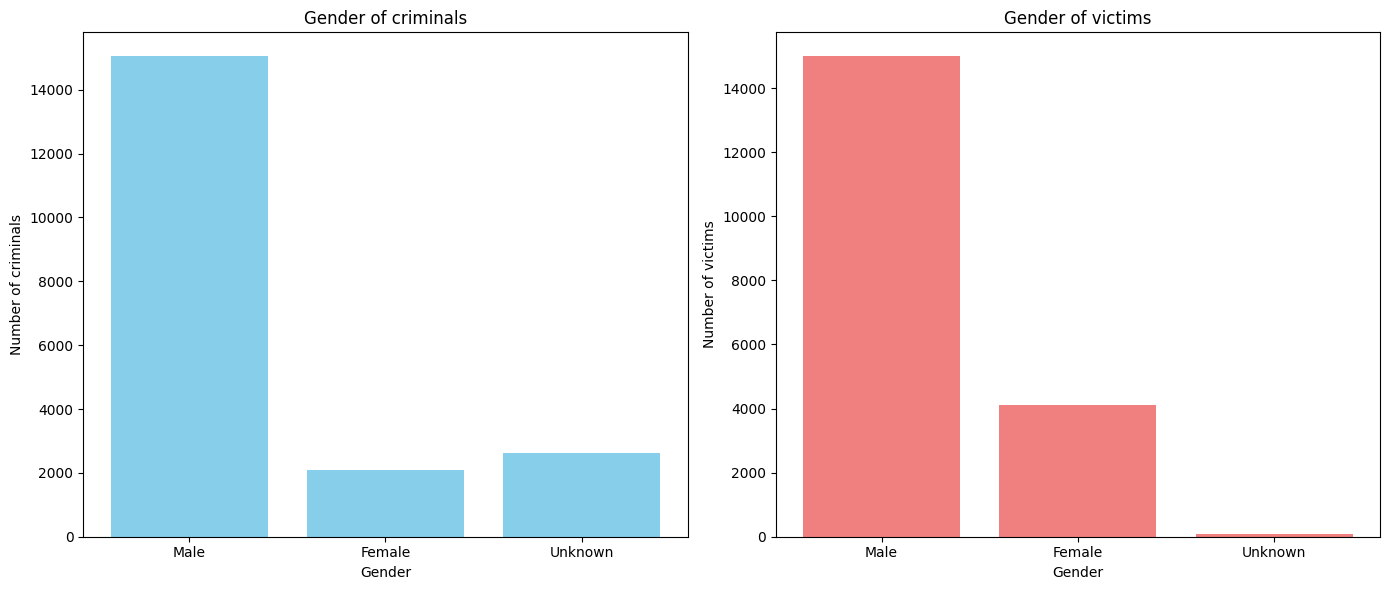

In [ ]:
# Data on gender of offenders
offender_sex_data = {
    "Male": 15045,
    "Female": 2100,
    "Unknown": 2631
}

victim_sex_data = {
    "Male": 14994,
    "Female": 4120,
    "Unknown": 86
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(list(offender_sex_data.keys()), list(offender_sex_data.values()), color='skyblue')
axes[0].set_title('Gender of criminals')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of criminals')

axes[1].bar(list(victim_sex_data.keys()), list(victim_sex_data.values()), color='lightcoral')
axes[1].set_title('Gender of victims')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Number of victims')

plt.tight_layout()
plt.show()


In [ ]:
total_offenders = sum(offender_sex_data.values())
percentage_offenders = {sex: (count / total_offenders) * 100 for sex, count in offender_sex_data.items()}

# percentage of offenders
percentage_offenders

{'Male': 76.07706310679612,
 'Female': 10.61893203883495,
 'Unknown': 13.30400485436893}

In [ ]:
total_victims = sum(victim_sex_data.values())
percentage_victims = {sex: (count / total_victims) * 100 for sex, count in victim_sex_data.items()}
percentage_victims
# percentage of victims
#  we can see the difference between the number of female victims, male victims and the number of female maniacs
#  There are more female victims than female maniacs. while the ratio of male victims and male maniacs is almost equal

{'Male': 78.09375, 'Female': 21.458333333333332, 'Unknown': 0.4479166666666667}

In [ ]:
df.head(5)

,series,Male,Female,Unknown
0,data,14994,4120,86


In [ ]:
df2.value_counts()


key           value
Hispanic      2622     1
Multiple      0        1
Not Hispanic  9497     1
Unknown       4930     1
dtype: int64